# India Rainfall Analysis

create a streamlet website on rainfall prediction on the ML model

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Types of graphs
- Bar graphs showing distribution of amount of rainfall.
- Distribution of amount of rainfall yearly, monthly, groups of months.
- Distribution of rainfall in subdivisions, districts form each month, groups of months.
- Heat maps showing correlation between amount of rainfall between months.


In [29]:
# data = pd.read_csv("./rainfall in india 1901-2015.csv")
# # data = data.fillna(data.select_dtypes(include=['number']).mean())

In [30]:
# data.shape

In [31]:
# # Find rows with at least one null value
# rows_with_null = data.isnull().any(axis=1)

# # Print these rows (optional)
# print(data[rows_with_null].shape)

In [32]:
# # Drop the rows where `rows_with_null` is True
# data = data.drop(data[rows_with_null].index)

In [ ]:
# Tuning Random Forest...
# Fitting 3 folds for each of 216 candidates, totalling 648 fits
# Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
# Tuning Gradient Boosting...
# Fitting 3 folds for each of 243 candidates, totalling 729 fits
# Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}

# Evaluating Tuned Random Forest...
# Mean Absolute Error (Test): 86.56703470942662
# MEAN 2005
# 121.2111111111111 130.85688735486417
# Standard deviation 2005
# 123.77066107608005 89.22229666862097
# MEAN 2010
# 139.93333333333334 133.425098391174
# Standard deviation 2010
# 135.71320250194282 105.70203601641536
# MEAN 2015
# 88.52222222222223 122.36176454530839
# Standard deviation 2015
# 86.62446123324875 87.09946021220826

In [33]:
# data.head()

In [34]:
data = pd.read_csv("./rainfall in india 1901-2015.csv")
data = data.fillna(data.select_dtypes(include=['number']).mean())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtypes: flo

In [35]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.569044,35.896396,46.925176,67.798192,123.189974,234.568120,269.310313,188.678707,135.309591,99.434452,68.593545,42.318098,900.986632,59.265023,201.096692,706.881054,166.678751
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.450000,4.100000,24.200000,574.375000,34.200000
50%,1958.000000,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.900000,259.500000,174.100000,65.750000,9.700000,3.100000,1125.450000,19.300000,75.200000,882.250000,98.800000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.700000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


## Dataset-1 Description
- Data has 36 sub divisions and 19 attributes (individual months, annual, combinations of 3 consecutive months).
- For some of the subdivisions data is from 1950 to 2015.
- All the attributes has the sum of amount of rainfall in mm.

In [36]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [37]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.569044,35.896396,46.925176,67.798192,123.189974,234.568120,269.310313,188.678707,135.309591,99.434452,68.593545,42.318098,900.986632,59.265023,201.096692,706.881054,166.678751
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.450000,4.100000,24.200000,574.375000,34.200000
50%,1958.000000,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.900000,259.500000,174.100000,65.750000,9.700000,3.100000,1125.450000,19.300000,75.200000,882.250000,98.800000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.700000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'JAN'}>, <Axes: title={'center': 'FEB'}>,
        <Axes: title={'center': 'MAR'}>],
       [<Axes: title={'center': 'APR'}>, <Axes: title={'center': 'MAY'}>,
        <Axes: title={'center': 'JUN'}>, <Axes: title={'center': 'JUL'}>],
       [<Axes: title={'center': 'AUG'}>, <Axes: title={'center': 'SEP'}>,
        <Axes: title={'center': 'OCT'}>, <Axes: title={'center': 'NOV'}>],
       [<Axes: title={'center': 'DEC'}>,
        <Axes: title={'center': 'ANNUAL'}>,
        <Axes: title={'center': 'Jan-Feb'}>,
        <Axes: title={'center': 'Mar-May'}>],
       [<Axes: title={'center': 'Jun-Sep'}>,
        <Axes: title={'center': 'Oct-Dec'}>, <Axes: >, <Axes: >]],
      dtype=object)

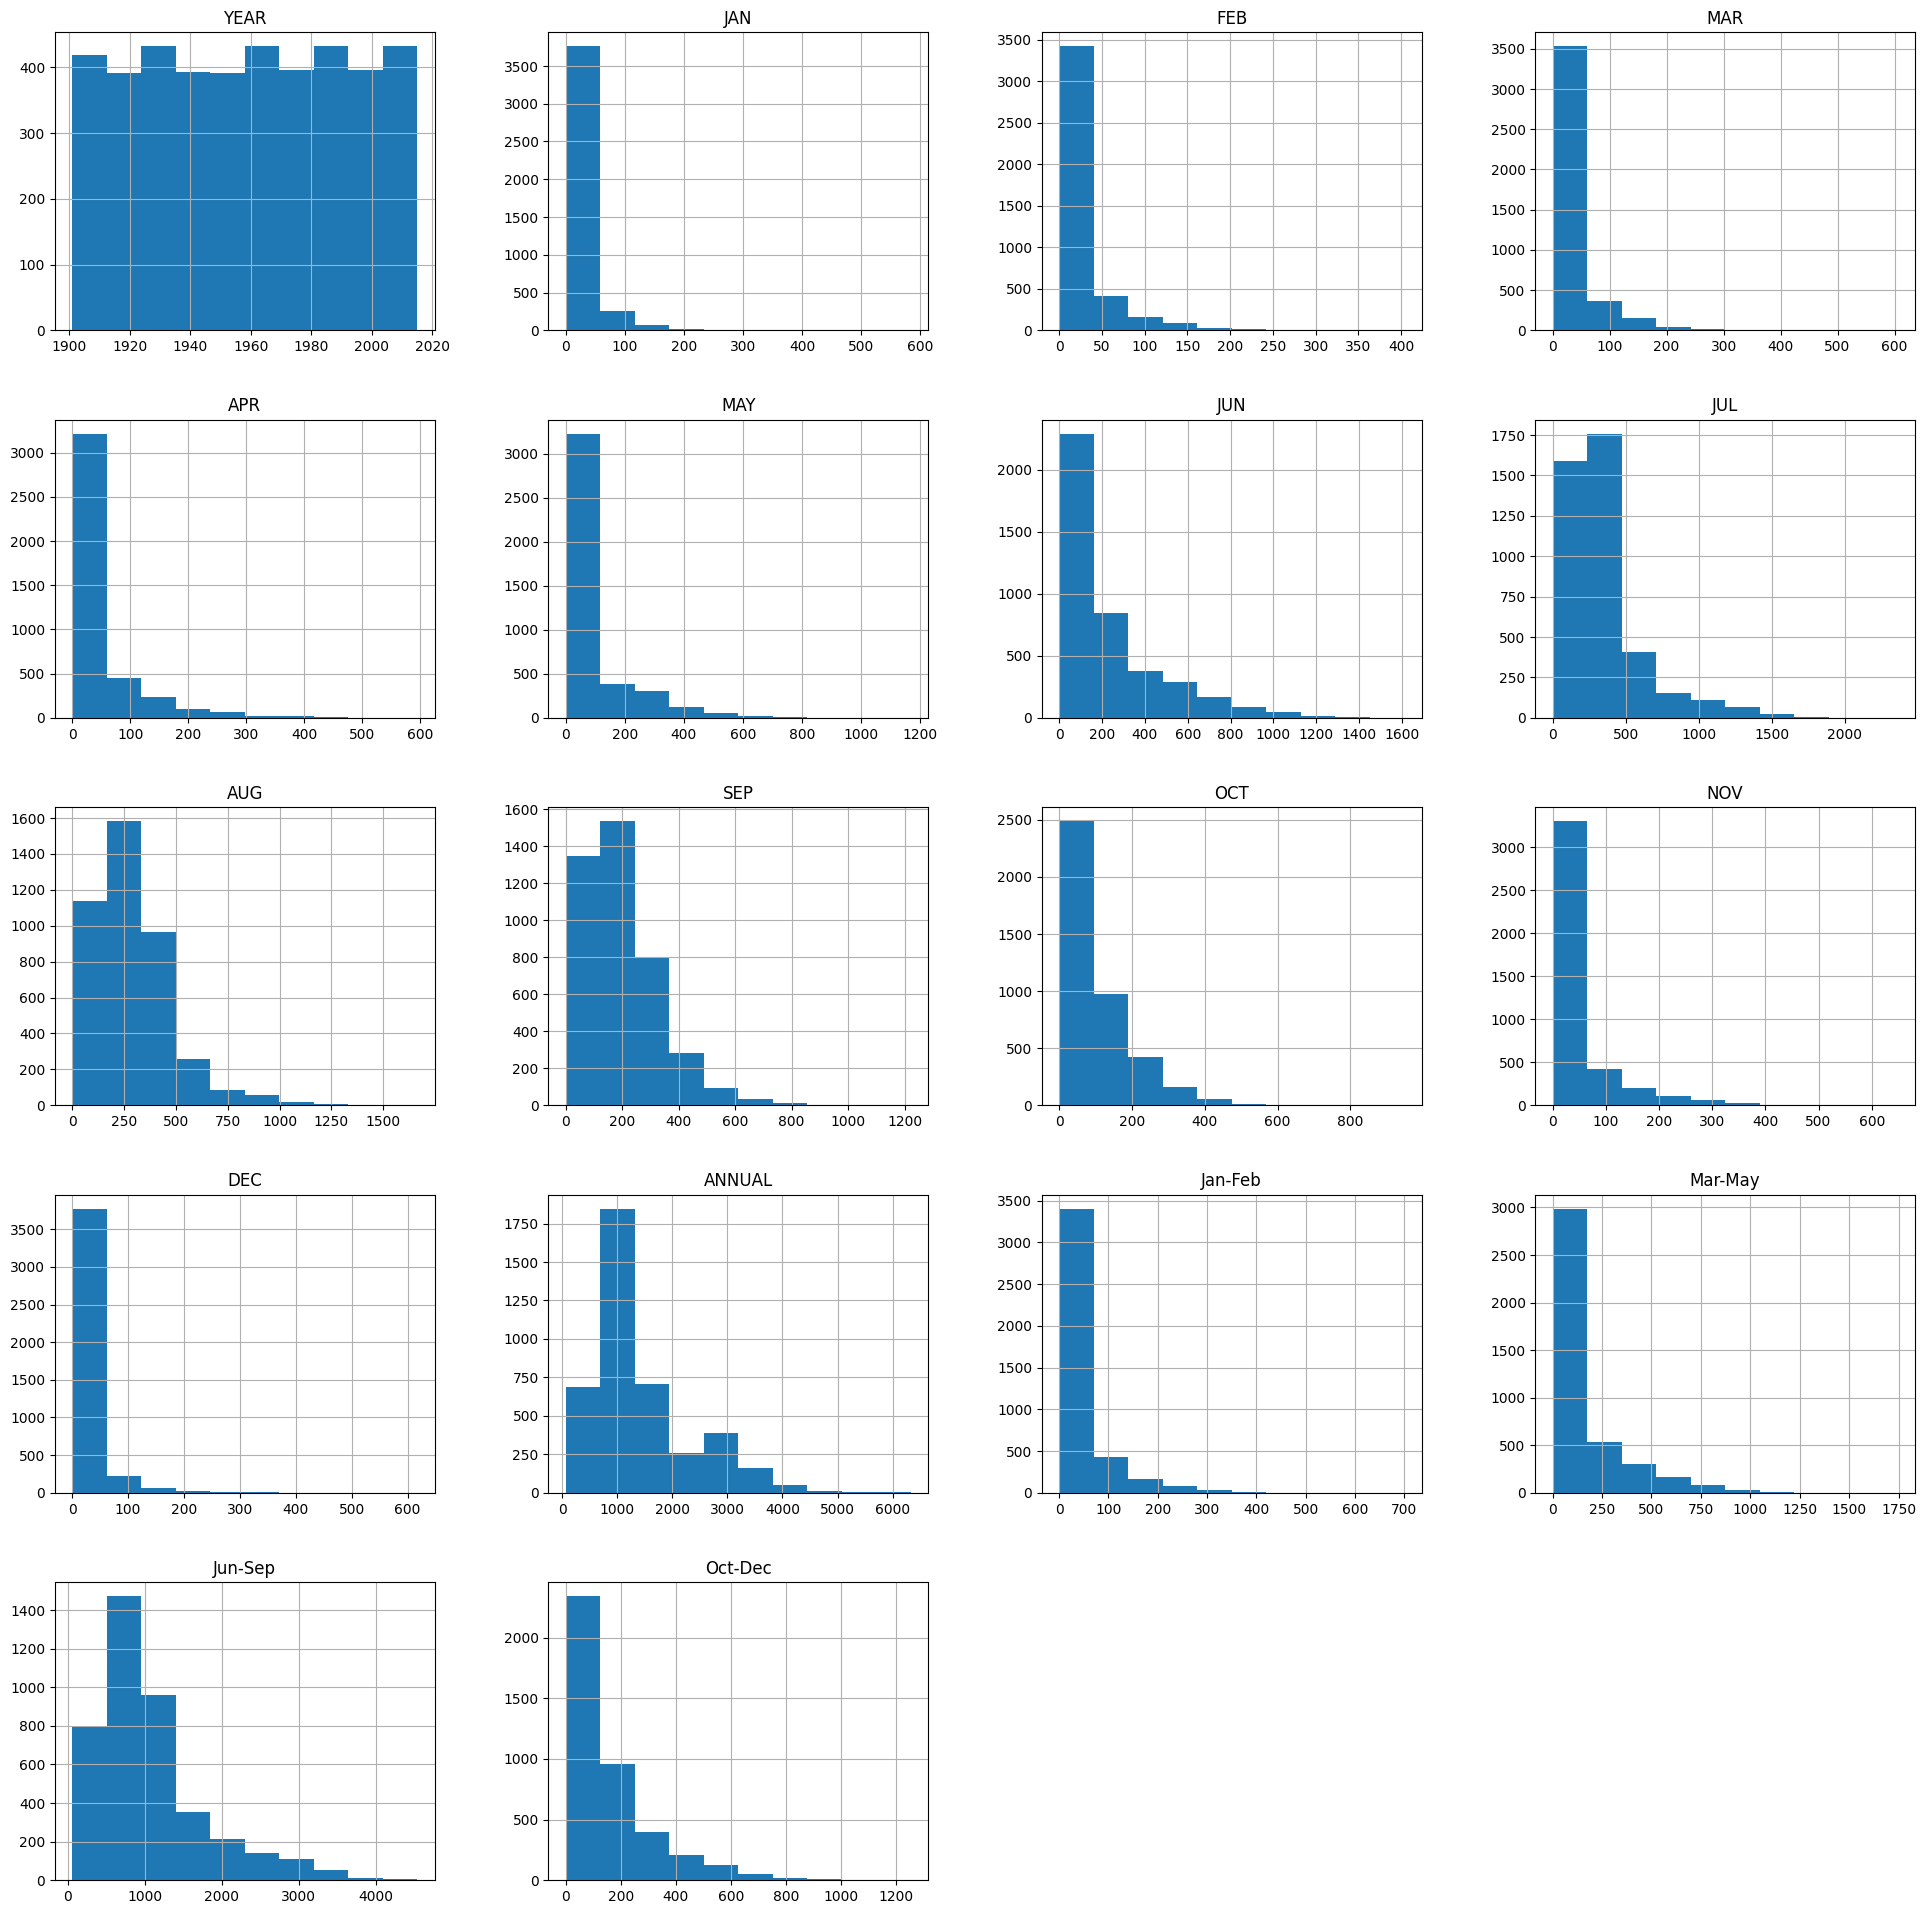

In [38]:
data.hist(figsize=(24,24))

## Observations
- Above histograms show the distribution of rainfall over months.
- Observed increase in amount of rainfall over months July, August, September.

<Axes: xlabel='YEAR'>

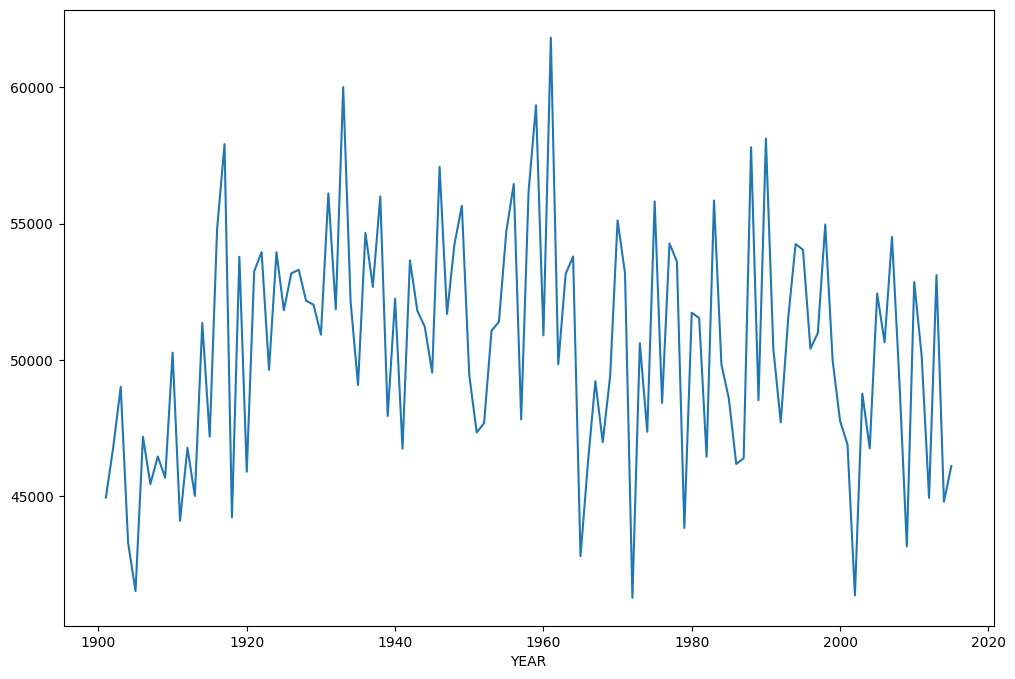

In [39]:
data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8))

## Observations
- Shows distribution of rainfall over years. 
- Observed high amount of rainfall in 1950s.

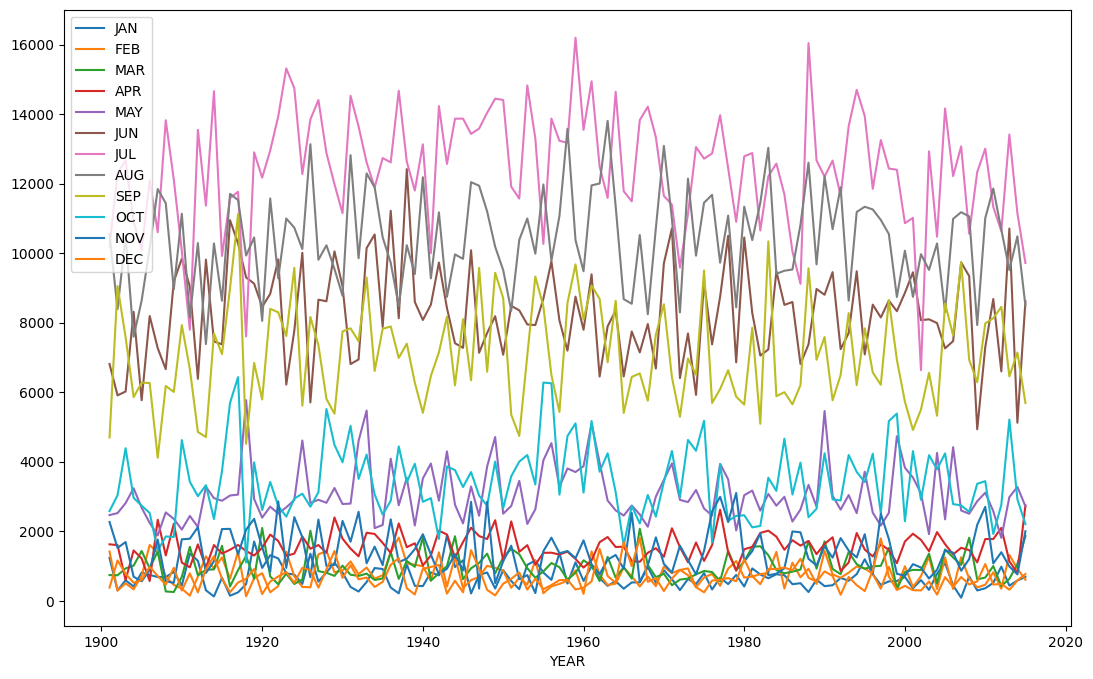

In [40]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8));

<Axes: xlabel='YEAR'>

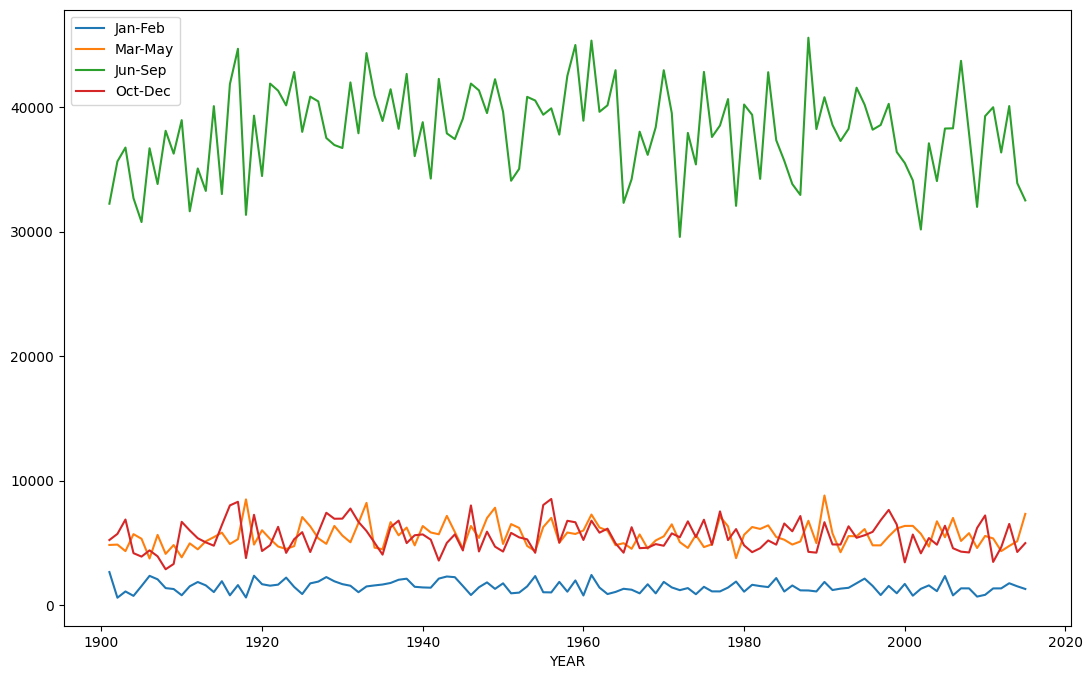

In [41]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8))

## Observations
- The above two graphs show the distribution of rainfall over months.
- The graphs clearly shows that amount of rainfall in high in the months july, aug, sep which is monsoon season in India.

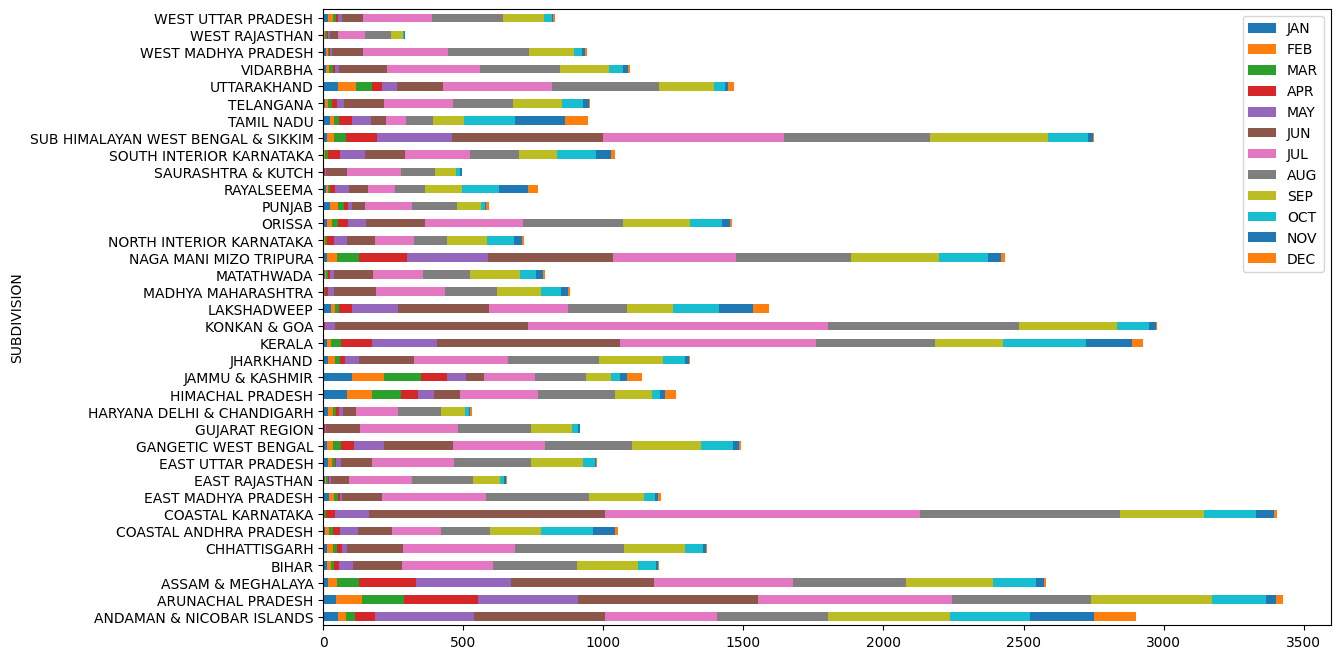

In [42]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

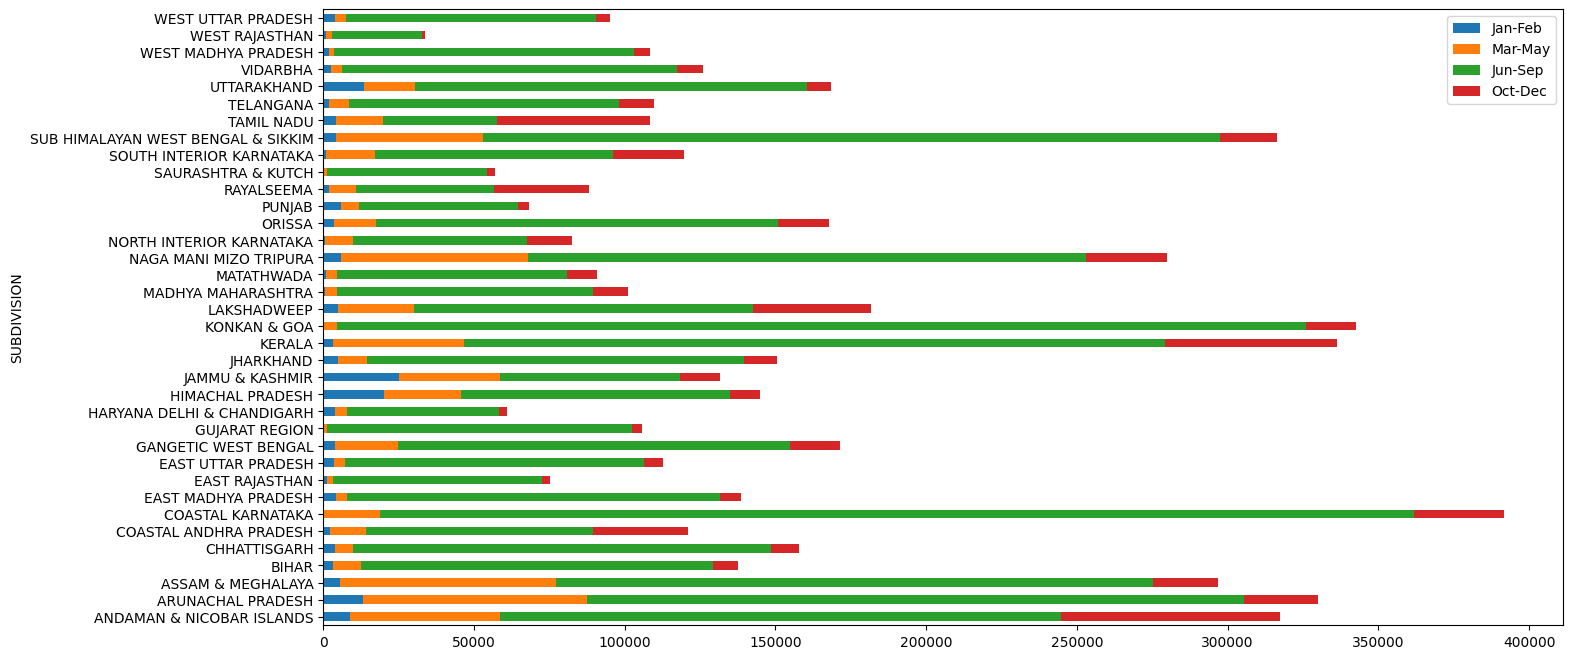

In [43]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

## Observations
- Above two graphs shows that the amount of rainfall is reasonably good in the months of march, april, may in eastern India. 

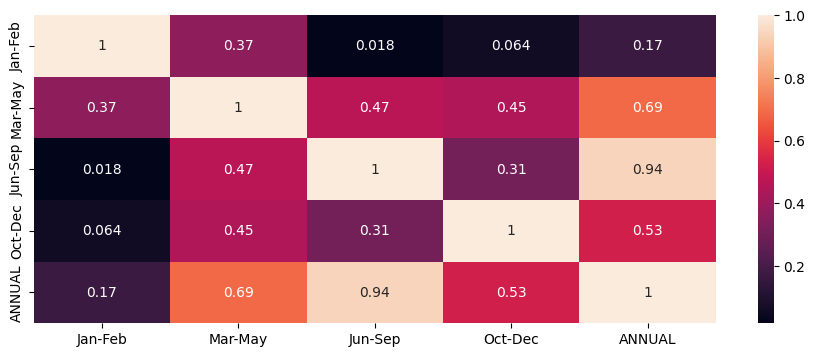

In [44]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

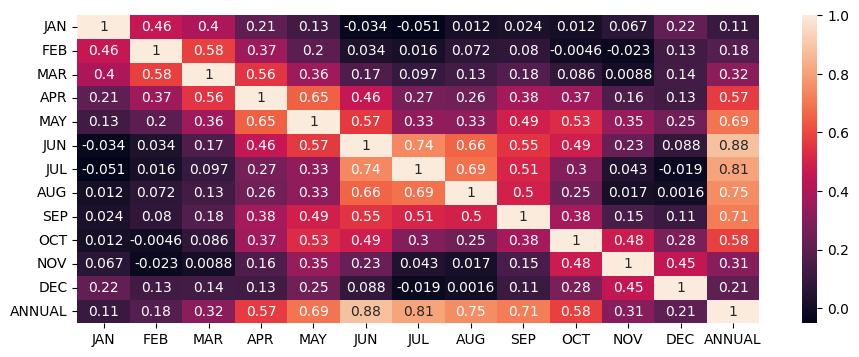

In [45]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

## Observations
- **Heat Map** shows the co-relation(dependency) betwenn the amounts of rainfall over months.
- From above it is clear that if amount of rainfall is high in the months of july, august, september then the amount of rainfall will be high annually.
- It is also obwserved that if amount of rainfall in good in the months of october, november, december then the rainfall is going to b good in the overall year. 

In [46]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

## Predictions
- For prediction we formatted data in the way, given the rainfall in the last three months we try to predict the rainfall in the next consecutive month.
- For all the experiments we used 80:20 training and test ratio.
    - Linear regression
    - SVR
    - Artificial neural nets
- Tersting metrics: We used Mean absolute error to train the models.
- We also shown the amount of rainfall actually and predicted with the histogram plots.
- We did two types of trainings once training on complete dataset and other with training with only telangana data
- All means are standard deviation observations are written, first one represents ground truth, second one represents predictions.


In [47]:
# seperation of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [48]:
import numpy as np
import pandas as pd

# Assuming your dataframe is `data` and it includes a 'SUBDIVISION' column
subdivisions = data['SUBDIVISION'].unique()

# Dictionary to hold the data for each subdivision
data_list = {}

# Loop through each subdivision and store the data for each year
for subdivision in subdivisions:
    # Filter data for the current subdivision
    subdivision_data_frame = data[data['SUBDIVISION'] == subdivision]
    
    # Initialize a dictionary for the current subdivision
    subdivision_year_data = {}

    # Assuming the columns are 'JAN', 'FEB', ..., 'DEC'
    for year in range(1901, 2016):  # Replace with actual range of years you have
        year_data = subdivision_data_frame[subdivision_data_frame['YEAR'] == year]
        
        # Extract the monthly data (JAN to DEC)
        monthly_data = year_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
                                  'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].values
        
        # Store the monthly data in the dictionary for this year
        subdivision_year_data[year] = monthly_data
    
    # Store the data for this subdivision
    data_list[subdivision] = subdivision_year_data

# Example to access the data for a specific subdivision and year
subdivision_example = subdivisions[0]  # Replace with the subdivision you want
year_example = 1919  # Replace with the year you want
data_for_subdivision_year = data_list[subdivision_example][year_example]

print(f"Data for {subdivision_example} in {year_example}:")
print(data_for_subdivision_year)

x = data_list[subdivision_example]
print(x)
# for subdivision in subdivisions:
#     subdivision_example = subdivisions[i]  # Replace with the subdivision you want
#     year_example = 2015  # Replace with the year you want
#     data_for_subdivision_year = data_list[subdivision_example][year_example]

#     print(f"Data for {subdivision_example} in {year_example}:")
#     print(data_for_subdivision_year)



Data for ANDAMAN & NICOBAR ISLANDS in 1919:
[[ 10.2  18.    0.   35.5 283.9 542.5 246.5 259.8 170.7 186.2 340.4 258.4]]
{1901: array([[ 49.2,  87.1,  29.2,   2.3, 528.8, 517.5, 365.1, 481.1, 332.6,
        388.5, 558.2,  33.6]]), 1902: array([[  0. , 159.8,  12.2,   0. , 446.1, 537.1, 228.9, 753.7, 666.2,
        197.2, 359. , 160.5]]), 1903: array([[ 12.7, 144. ,   0. ,   1. , 235.1, 479.9, 728.4, 326.7, 339. ,
        181.2, 284.4, 225. ]]), 1904: array([[  9.4,  14.7,   0. , 202.4, 304.5, 495.1, 502. , 160.1, 820.4,
        222.2, 308.7,  40.1]]), 1905: array([[  1.3,   0. ,   3.3,  26.9, 279.5, 628.7, 368.7, 330.5, 297. ,
        260.7,  25.4, 344.7]]), 1906: array([[ 36.6,   0. ,   0. ,   0. , 556.1, 733.3, 247.7, 320.5, 164.3,
        267.8, 128.9,  79.2]]), 1907: array([[110.7,   0. , 113.3,  21.6, 616.3, 305.2, 443.9, 377.6, 200.4,
        264.4, 648.9, 245.6]]), 1908: array([[ 20.9,  85.1,   0. ,  29. , 562. , 693.6, 481.4, 699.9, 428.8,
        170.7, 208.1, 196.9]]), 1909: a

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'data' contains the columns: 'SUBDIVISION', 'YEAR', 'JAN', 'FEB', ..., 'DEC'

# Initialize an empty dictionary to store the X and y for each subdivision
subdivision_data_dict = {}

# Loop through each subdivision in the data
for subdivision in data['SUBDIVISION'].unique():
    # Filter the data for the current subdivision
    subdivision_data = data[data['SUBDIVISION'] == subdivision]
    
    # Extract monthly data from the 'JAN' to 'DEC' columns
    division_data = np.asarray(subdivision_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
    
    # Initialize X and y for the current subdivision
    X_subdivision = None
    y_subdivision = None

    # Loop through each possible window of 6 months for X and the next month as y
    for i in range(division_data.shape[1] - 6):  # Only up to 'OCT' as 'X' (the 6-month window) and 'NOV' as y
        # Create X (6 consecutive months)
        X_window = division_data[:, i:i+6]
        
        # Create y (the next month)
        y_month = division_data[:, i+6]
        
        # Concatenate the windows to X_subdivision and y_subdivision
        if X_subdivision is None:
            X_subdivision = X_window
            y_subdivision = y_month
        else:
            X_subdivision = np.concatenate((X_subdivision, X_window), axis=0)
            y_subdivision = np.concatenate((y_subdivision, y_month), axis=0)
    
    # Store the X and y for the current subdivision in the dictionary
    subdivision_data_dict[subdivision] = (X_subdivision, y_subdivision)

# Example: Access data for a specific subdivision (e.g., 'ANDAMAN & NICOBAR ISLANDS')
subdivision = 'ANDAMAN & NICOBAR ISLANDS'
X_andaman, y_andaman = subdivision_data_dict[subdivision]

# Print the X and y for the specific subdivision
print(f"X for {subdivision}: {X_andaman.shape}")
print(f"y for {subdivision}: {y_andaman.shape}")

# If needed, split into train-test for the specific subdivision
X_train, X_test, y_train, y_test = train_test_split(X_andaman, y_andaman, test_size=0.1, random_state=42)

# Example output for train-test split
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X for ANDAMAN & NICOBAR ISLANDS: (660, 6)
y for ANDAMAN & NICOBAR ISLANDS: (660,)
X_train shape: (594, 6)
y_train shape: (594,)


In [58]:
subdivisions

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [71]:
# def data_of_2005_2010_2015(subdivision_name = 'PUNJAB'):
#     #test 2005
#     temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
#         'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2005]

#     data_2005 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
#         'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == subdivision_name])

#     X_year_2005 = None; y_year_2005 = None
#     for i in range(data_2005.shape[1]-6):
#         if X_year_2005 is None:
#             X_year_2005 = data_2005[:, i:i+6]
#             y_year_2005 = data_2005[:, i+6]
#         else:
#             X_year_2005 = np.concatenate((X_year_2005, data_2005[:, i:i+6]), axis=0)
#             y_year_2005 = np.concatenate((y_year_2005, data_2005[:, i+6]), axis=0)

#     #test 2010
#     temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
#         'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]

#     data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
#         'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == subdivision_name])

#     X_year_2010 = None; y_year_2010 = None
#     for i in range(data_2010.shape[1]-6):
#         if X_year_2010 is None:
#             X_year_2010 = data_2010[:, i:i+6]
#             y_year_2010 = data_2010[:, i+6]
#         else:
#             X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+6]), axis=0)
#             y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+6]), axis=0)

#     #terst 2015
#     temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
#         'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

#     data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
#         'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == subdivision_name])

#     X_year_2015 = None; y_year_2015 = None
#     for i in range(data_2015.shape[1]-6):
#         if X_year_2015 is None:
#             X_year_2015 = data_2015[:, i:i+6]
#             y_year_2015 = data_2015[:, i+6]
#         else:
#             X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+6]), axis=0)
#             y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+6]), axis=0)


#     return X_year_2005,y_year_2005,X_year_2010,y_year_2010,X_year_2015,y_year_2015

In [70]:
import numpy as np

def get_data_for_year(subdivision_name, year):
    # Filter data for the given year and subdivision
    temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
                 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == year]
    data_year = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
                                 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == subdivision_name])

    # Initialize X and y arrays for the given year
    X_year = None
    y_year = None
    
    # Loop to create sliding windows for X (6 months) and y (next month)
    for i in range(data_year.shape[1] - 6):
        if X_year is None:
            X_year = data_year[:, i:i+6]
            y_year = data_year[:, i+6]
        else:
            X_year = np.concatenate((X_year, data_year[:, i:i+6]), axis=0)
            y_year = np.concatenate((y_year, data_year[:, i+6]), axis=0)
    
    return X_year, y_year

def data_of_2005_2010_2015(subdivision_name='PUNJAB'):
    # Get data for the years 2005, 2010, and 2015
    X_year_2005, y_year_2005 = get_data_for_year(subdivision_name, 2005)
    X_year_2010, y_year_2010 = get_data_for_year(subdivision_name, 2010)
    X_year_2015, y_year_2015 = get_data_for_year(subdivision_name, 2015)
    
    return X_year_2005, y_year_2005, X_year_2010, y_year_2010, X_year_2015, y_year_2015

# Example usage:
X_year_2005, y_year_2005, X_year_2010, y_year_2010, X_year_2015, y_year_2015 = data_of_2005_2010_2015()

# Print shapes for verification
print(f"X_year_2005 shape: {X_year_2005.shape}, y_year_2005 shape: {y_year_2005.shape}")
print(f"X_year_2010 shape: {X_year_2010.shape}, y_year_2010 shape: {y_year_2010.shape}")
print(f"X_year_2015 shape: {X_year_2015.shape}, y_year_2015 shape: {y_year_2015.shape}")


X_year_2005 shape: (6, 6), y_year_2005 shape: (6,)
X_year_2010 shape: (6, 6), y_year_2010 shape: (6,)
X_year_2015 shape: (6, 6), y_year_2015 shape: (6,)


In [72]:
# Example: Access data for a specific subdivision (e.g., 'ANDAMAN & NICOBAR ISLANDS')
subdivision = 'ANDAMAN & NICOBAR ISLANDS'
X_andaman, y_andaman = subdivision_data_dict[subdivision]

# Print the X and y for the specific subdivision
print(f"X for {subdivision}: {X_andaman.shape}")
print(f"y for {subdivision}: {y_andaman.shape}")

# If needed, split into train-test for the specific subdivision
X_train, X_test, y_train, y_test = train_test_split(X_andaman, y_andaman, test_size=0.1, random_state=42)

# Example output for train-test split
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X for ANDAMAN & NICOBAR ISLANDS: (660, 6)
y for ANDAMAN & NICOBAR ISLANDS: (660,)
X_train shape: (594, 6)
y_train shape: (594,)


In [73]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

125.56978111207636


In [77]:
# def plot_graphs(groundtruth, prediction, title):
#     plt.figure(figsize=(10, 6))

#     # Ensure both groundtruth and prediction are of the same shape
#     if len(groundtruth) != len(prediction):
#         print(f"Warning: Mismatch in data length for {title}.")
#         min_len = min(len(groundtruth), len(prediction))
#         groundtruth = groundtruth[:min_len]
#         prediction = prediction[:min_len]

#     plt.plot(groundtruth, label='Actual', color='blue', linestyle='-', marker='o')
#     plt.plot(prediction, label='Predicted', color='red', linestyle='--', marker='x')

#     plt.title(f"Actual vs Predicted: {title}")
#     plt.xlabel("Months")
#     plt.ylabel("Rainfall")
#     plt.legend()
#     plt.show()

# # Plot graphs for 2005, 2010, and 2015
# plot_graphs(y_year_2005, y_year_pred_2005, "Year-2005")
# plot_graphs(y_year_2010, y_year_pred_2010, "Year-2010")
# plot_graphs(y_year_2015, y_year_pred_2015, "Year-2015")

def plot_graphs(groundtruth, prediction, title):
    plt.figure(figsize=(10, 6))

    # Check if the lengths match, else truncate the longer one
    if len(groundtruth) != len(prediction):
        print(f"Warning: Mismatch in data length for {title}.")
        min_len = min(len(groundtruth), len(prediction))
        groundtruth = groundtruth[:min_len]
        prediction = prediction[:min_len]

    # Plot actual vs predicted values
    plt.plot(groundtruth, label='Actual', color='blue', linestyle='-', marker='o')
    plt.plot(prediction, label='Predicted', color='red', linestyle='--', marker='x')

    plt.title(f"Actual vs Predicted: {title}")
    plt.xlabel("Months")
    plt.ylabel("Rainfall")
    plt.legend()
    plt.show()


MEAN 2005
63.18333333333333 356.6087530161696
Standard deviation 2005
67.99170088245248 18.796341989272612
MEAN 2010
63.916666666666664 364.1435291587045
Standard deviation 2010
56.06512334380043 18.29559691283083
MEAN 2015
49.75 353.37557676713146
Standard deviation 2015
49.703110231319194 11.797412845548


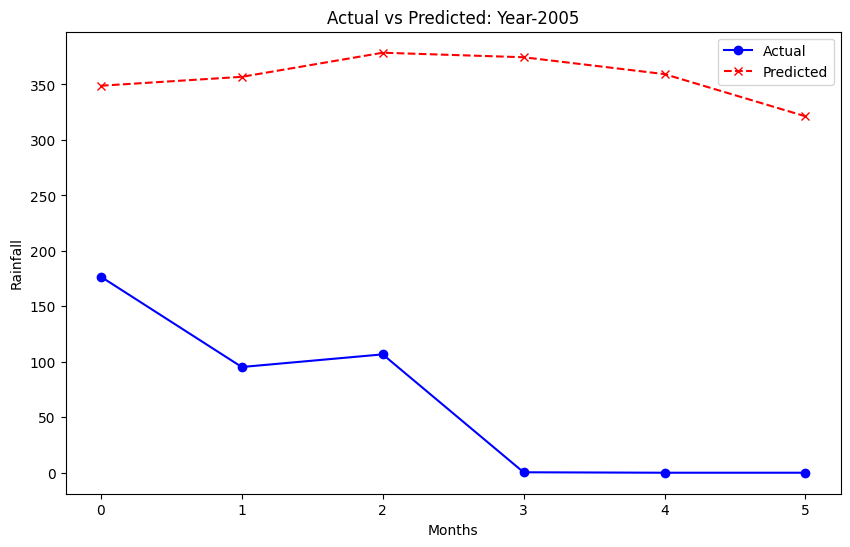

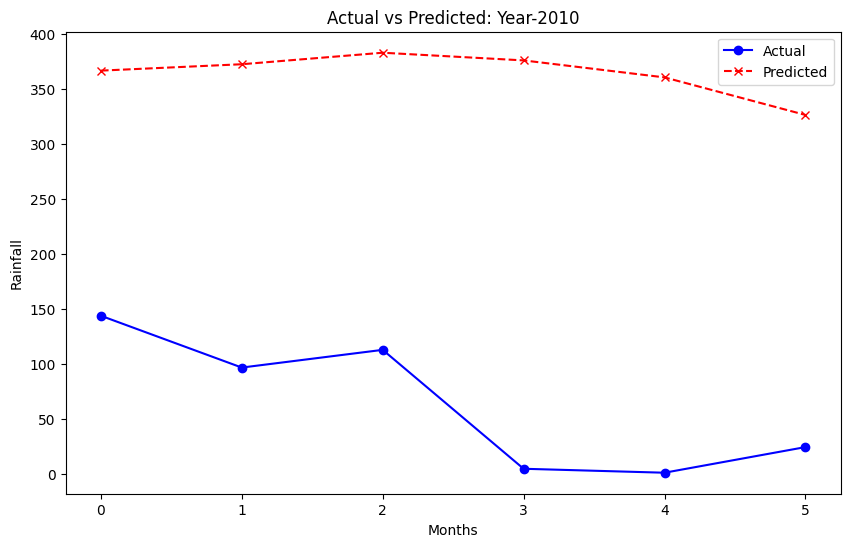

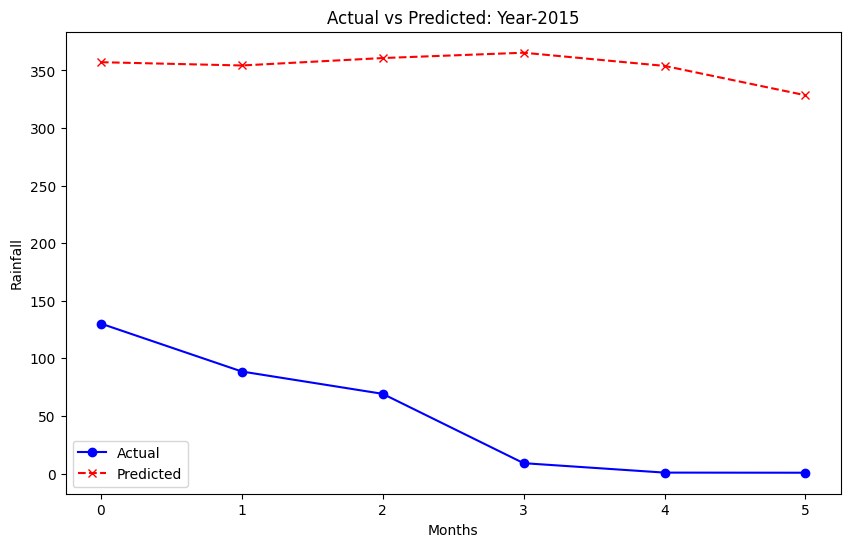

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error

# Assuming X_train, X_test, y_train, y_test, X_year_2005, X_year_2010, X_year_2015, y_year_2005, y_year_2010, y_year_2015 are already defined

# Train the ElasticNet model
reg = ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)

# Predictions for 2005, 2010, and 2015
y_year_pred_2005 = reg.predict(X_year_2005)
y_year_pred_2010 = reg.predict(X_year_2010)
y_year_pred_2015 = reg.predict(X_year_2015)

# Print statistics for 2005
print("MEAN 2005")
print(np.mean(y_year_2005), np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)), np.sqrt(np.var(y_year_pred_2005)))

# Print statistics for 2010
print("MEAN 2010")
print(np.mean(y_year_2010), np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)), np.sqrt(np.var(y_year_pred_2010)))

# Print statistics for 2015
print("MEAN 2015")
print(np.mean(y_year_2015), np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)), np.sqrt(np.var(y_year_pred_2015)))

# Define a function for plotting the graphs
def plot_graphs(groundtruth, prediction, title):
    plt.figure(figsize=(10, 6))

    # Check if the lengths match, else truncate the longer one
    if len(groundtruth) != len(prediction):
        print(f"Warning: Mismatch in data length for {title}.")
        min_len = min(len(groundtruth), len(prediction))
        groundtruth = groundtruth[:min_len]
        prediction = prediction[:min_len]

    # Plot actual vs predicted values
    plt.plot(groundtruth, label='Actual', color='blue', linestyle='-', marker='o')
    plt.plot(prediction, label='Predicted', color='red', linestyle='--', marker='x')

    plt.title(f"Actual vs Predicted: {title}")
    plt.xlabel("Months")
    plt.ylabel("Rainfall")
    plt.legend()
    plt.show()

# Plot graphs for 2005, 2010, and 2015
plot_graphs(y_year_2005, y_year_pred_2005, "Year-2005")
plot_graphs(y_year_2010, y_year_pred_2010, "Year-2010")
plot_graphs(y_year_2015, y_year_pred_2015, "Year-2015")


MEAN 2005
63.18333333333333 356.6087530161696
Standard deviation 2005
67.99170088245248 18.796341989272612
MEAN 2010
63.916666666666664 364.1435291587045
Standard deviation 2010
56.06512334380043 18.29559691283083
MEAN 2015
49.75 353.37557676713146
Standard deviation 2015
49.703110231319194 11.797412845548


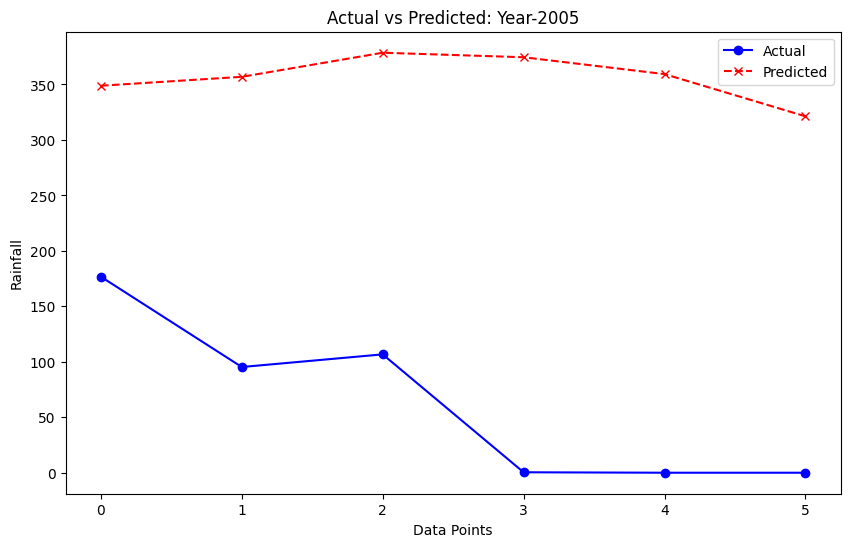

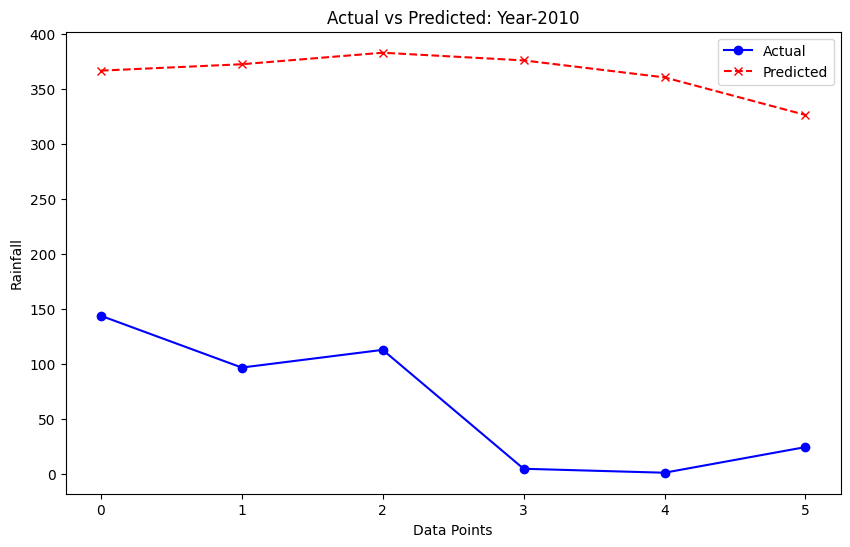

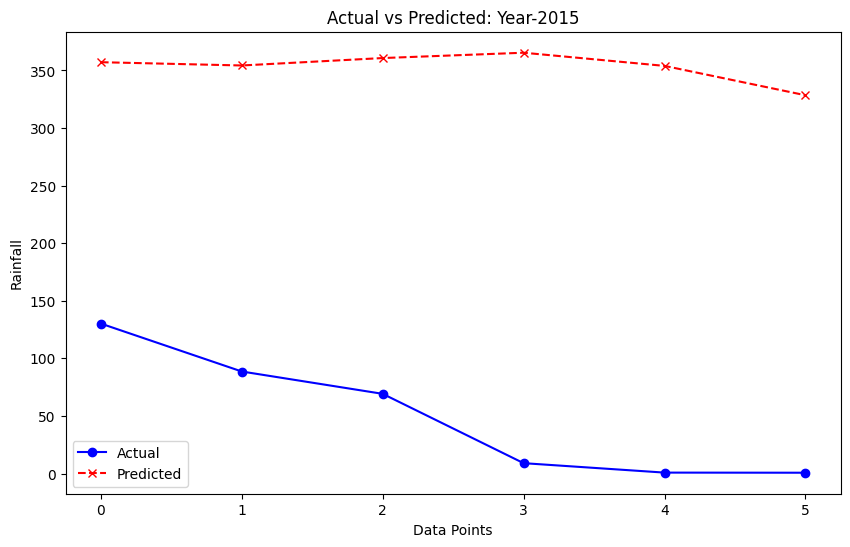

In [ ]:
# 2005
y_year_pred_2005 = reg.predict(X_year_2005)

# 2010
y_year_pred_2010 = reg.predict(X_year_2010)

# 2015
y_year_pred_2015 = reg.predict(X_year_2015)

# Print statistics for 2005
print("MEAN 2005")
print(np.mean(y_year_2005), np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)), np.sqrt(np.var(y_year_pred_2005)))

# Print statistics for 2010
print("MEAN 2010")
print(np.mean(y_year_2010), np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)), np.sqrt(np.var(y_year_pred_2010)))

# Print statistics for 2015
print("MEAN 2015")
print(np.mean(y_year_2015), np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)), np.sqrt(np.var(y_year_pred_2015)))

# Plot graphs
plot_graphs(y_year_2005, y_year_pred_2005, "Year-2005")
plot_graphs(y_year_2010, y_year_pred_2010, "Year-2010")
plot_graphs(y_year_2015, y_year_pred_2015, "Year-2015")


In [20]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

127.1600615632603


In [24]:
# 2005
y_year_pred_2005 = reg.predict(X_year_2005)

# 2010
y_year_pred_2010 = reg.predict(X_year_2010)

# 2015
y_year_pred_2015 = reg.predict(X_year_2015)

# Print statistics for 2005
print("MEAN 2005")
print(np.mean(y_year_2005), np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)), np.sqrt(np.var(y_year_pred_2005)))

# Print statistics for 2010
print("MEAN 2010")
print(np.mean(y_year_2010), np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)), np.sqrt(np.var(y_year_pred_2010)))

# Print statistics for 2015
print("MEAN 2015")
print(np.mean(y_year_2015), np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)), np.sqrt(np.var(y_year_pred_2015)))


MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.86310230416439
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601724
MEAN 2015
88.52222222222223 119.64752006738831
Standard deviation 2015
86.62446123324875 62.36355370163372


In [79]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv1D, Flatten

# Define the NN model
inputs = Input(shape=(3, 1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)  # Final output layer
model = Model(inputs=[inputs], outputs=[x])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])

# Print model summary
model.summary()


ImportError: Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\tensorflow\python\__init__.py", line 66, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "c:\Python312\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 28, in <module>
    _pywrap_tensorflow = swig_import_helper()
                         ^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 15, in swig_import_helper
    import imp
ModuleNotFoundError: No module named 'imp'


Failed to load the native TensorFlow runtime.

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/g3doc/get_started/os_setup.md#import_error

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print mean_absolute_error(y_test, y_pred)

Train on 30005 samples, validate on 3334 samples
Epoch 1/10
30005/30005 [==============================] - 3s 111us/step - loss: 19589.7591 - mean_absolute_error: 88.2724 - val_loss: 17504.6129 - val_mean_absolute_error: 84.5918
Epoch 2/10
30005/30005 [==============================] - 2s 53us/step - loss: 18582.2211 - mean_absolute_error: 86.5600 - val_loss: 17480.7870 - val_mean_absolute_error: 84.0881
Epoch 3/10
30005/30005 [==============================] - 2s 54us/step - loss: 18466.6604 - mean_absolute_error: 86.3714 - val_loss: 17362.4027 - val_mean_absolute_error: 85.7931
Epoch 4/10
30005/30005 [==============================] - 2s 54us/step - loss: 18482.5326 - mean_absolute_error: 86.5104 - val_loss: 17358.8929 - val_mean_absolute_error: 86.6657
Epoch 5/10
30005/30005 [==============================] - 2s 54us/step - loss: 18358.7726 - mean_absolute_error: 86.0046 - val_loss: 17507.7787 - val_mean_absolute_error: 85.0990
Epoch 6/10
30005/30005 [==============================]

MEAN 2005
121.2111111111111 134.68699821349824
Standard deviation 2005
123.77066107608005 90.86310230416397
MEAN 2010
139.93333333333334 144.8050132651592
Standard deviation 2010
135.71320250194282 95.94931363601675
MEAN 2015
88.52222222222223 119.64752006738864
Standard deviation 2015
86.62446123324875 62.36355370163346


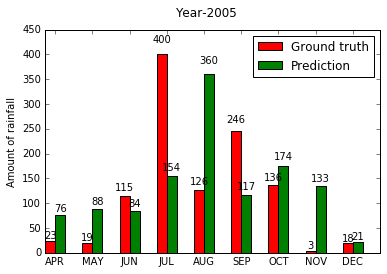

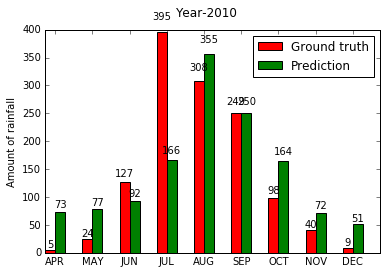

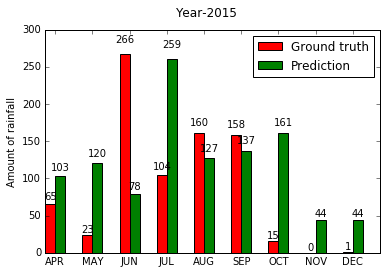

In [24]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print "MEAN 2005"
print np.mean(y_year_2005),np.mean(y_year_pred_2005)
print "Standard deviation 2005"
print np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005))


print "MEAN 2010"
print np.mean(y_year_2010),np.mean(y_year_pred_2010)
print "Standard deviation 2010"
print np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010))


print "MEAN 2015"
print np.mean(y_year_2015),np.mean(y_year_pred_2015)
print "Standard deviation 2015"
print np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015))

In [25]:
# spliting training and testing data only for telangana
telangana = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['SUBDIVISION'] == 'TELANGANA'])

X = None; y = None
for i in range(telangana.shape[1]-3):
    if X is None:
        X = telangana[:, i:i+3]
        y = telangana[:, i+3]
    else:
        X = np.concatenate((X, telangana[:, i:i+3]), axis=0)
        y = np.concatenate((y, telangana[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)        

In [26]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print mean_absolute_error(y_test, y_pred)

64.72601914484643


MEAN 2005
121.2111111111111 106.49798150231584
Standard deviation 2005
123.77066107608005 76.08558540019227
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737324
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713261


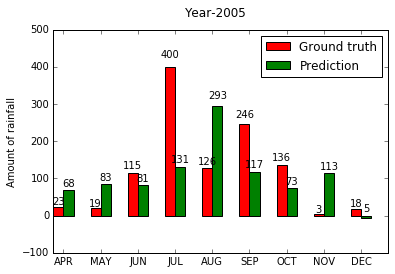

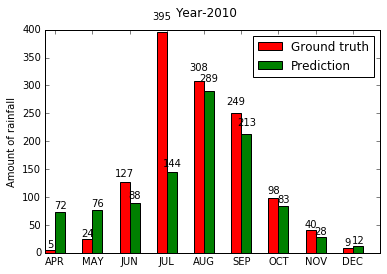

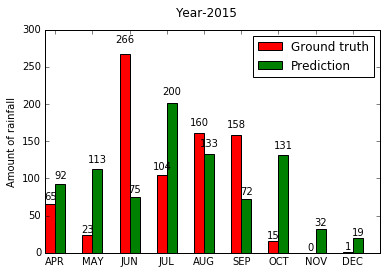

In [27]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print "MEAN 2005"
print np.mean(y_year_2005),np.mean(y_year_pred_2005)
print "Standard deviation 2005"
print np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005))


print "MEAN 2010"
print np.mean(y_year_2010),np.mean(y_year_pred_2010)
print "Standard deviation 2010"
print np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010))


print "MEAN 2015"
print np.mean(y_year_2015),np.mean(y_year_pred_2015)
print "Standard deviation 2015"
print np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015))

In [28]:
from sklearn.svm import SVR

# SVM model
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print mean_absolute_error(y_test, y_pred)

115.32415990638656


MEAN 2005
121.2111111111111 106.49798150231584
Standard deviation 2005
123.77066107608005 76.08558540019227
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737324
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713261


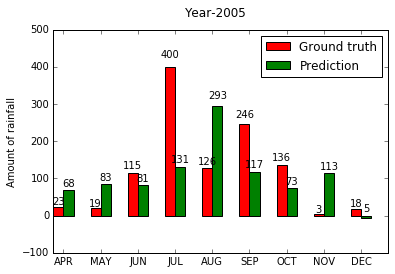

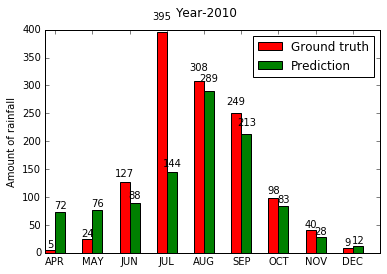

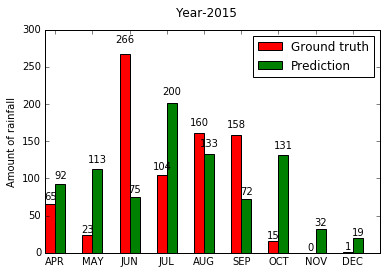

In [29]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print "MEAN 2005"
print np.mean(y_year_2005),np.mean(y_year_pred_2005)
print "Standard deviation 2005"
print np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005))


print "MEAN 2010"
print np.mean(y_year_2010),np.mean(y_year_pred_2010)
print "Standard deviation 2010"
print np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010))


print "MEAN 2015"
print np.mean(y_year_2015),np.mean(y_year_pred_2015)
print "Standard deviation 2015"
print np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [30]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print mean_absolute_error(y_test, y_pred)

Train on 921 samples, validate on 103 samples
Epoch 1/10
921/921 [==============================] - 0s 66us/step - loss: 7274.9487 - mean_absolute_error: 63.5027 - val_loss: 4981.0237 - val_mean_absolute_error: 51.2358
Epoch 2/10
921/921 [==============================] - 0s 56us/step - loss: 6431.8426 - mean_absolute_error: 56.7670 - val_loss: 4651.5261 - val_mean_absolute_error: 50.8381
Epoch 3/10
921/921 [==============================] - 0s 56us/step - loss: 6046.0127 - mean_absolute_error: 58.4860 - val_loss: 4725.7208 - val_mean_absolute_error: 52.5220
Epoch 4/10
921/921 [==============================] - 0s 56us/step - loss: 5883.5181 - mean_absolute_error: 56.4383 - val_loss: 4462.1687 - val_mean_absolute_error: 49.4729
Epoch 5/10
921/921 [==============================] - 0s 57us/step - loss: 5764.2698 - mean_absolute_error: 55.1780 - val_loss: 4419.6625 - val_mean_absolute_error: 49.3678
Epoch 6/10
921/921 [==============================] - 0s 55us/step - loss: 5706.7510 - me

MEAN 2005
121.2111111111111 106.49798150231584
Standard deviation 2005
123.77066107608005 76.08558540019227
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737324
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713261


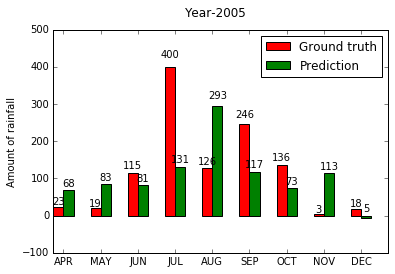

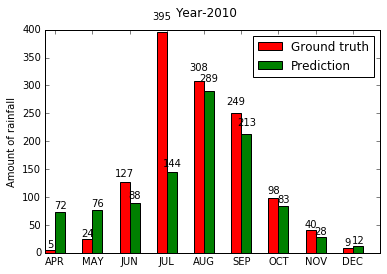

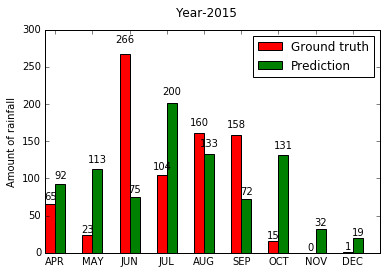

In [31]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print "MEAN 2005"
print np.mean(y_year_2005),np.mean(y_year_pred_2005)
print "Standard deviation 2005"
print np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005))


print "MEAN 2010"
print np.mean(y_year_2010),np.mean(y_year_pred_2010)
print "Standard deviation 2010"
print np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010))


print "MEAN 2015"
print np.mean(y_year_2015),np.mean(y_year_pred_2015)
print "Standard deviation 2015"
print np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

## Prediction Observations

### Training on complete dataset

|Algorithm|MAE|
|---------|---|
|Linear Regression|94.94821727619338|
|SVR|127.74073860203839|
|Artificial neural nets|85.2648713528865|

### Training on telangana dataset

|Algorithm| MAE|
|---------|----|
|Linear Regression| 70.61463829282977|
|SVR| 90.30526775954294|
|Artificial neural nets |59.95190786532157|

- Neural Networks performs better than SVR etc.
- Observed MAE is very high which indicates machine learning models won't work well for prediction of rainfall.
- Telangana data has a single pattern that can be learned by models, rather than learning different patterns of all states. so has high accuracy.
- Analysed individual year rainfall patterns for 2005, 2010, 2015.
- Approximately close means, noticed less standard deviations.

## District wise details
- Similar to above the number of attributes is same, we don’t have year in this.
- The amount of rainfall in mm for each district is added from 1950-2000.
- We analyse the data individually for the state **Andhra Pradesh**


In [32]:
district = pd.read_csv("../data/district_wise_rainfall_normal.csv",sep=",")
district = district.fillna(district.mean())
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
STATE_UT_NAME    641 non-null object
DISTRICT         641 non-null object
JAN              641 non-null float64
FEB              641 non-null float64
MAR              641 non-null float64
APR              641 non-null float64
MAY              641 non-null float64
JUN              641 non-null float64
JUL              641 non-null float64
AUG              641 non-null float64
SEP              641 non-null float64
OCT              641 non-null float64
NOV              641 non-null float64
DEC              641 non-null float64
ANNUAL           641 non-null float64
Jan-Feb          641 non-null float64
Mar-May          641 non-null float64
Jun-Sep          641 non-null float64
Oct-Dec          641 non-null float64
dtypes: float64(17), object(2)
memory usage: 95.2+ KB


In [33]:
district.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


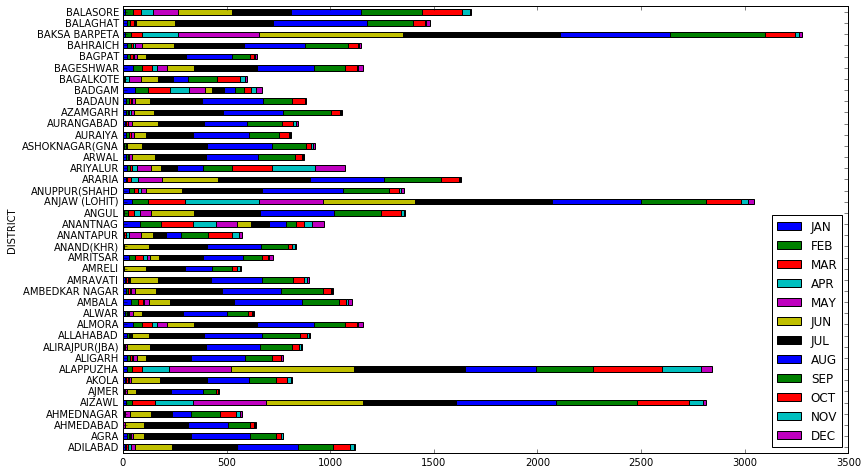

In [34]:
district[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(13,8));

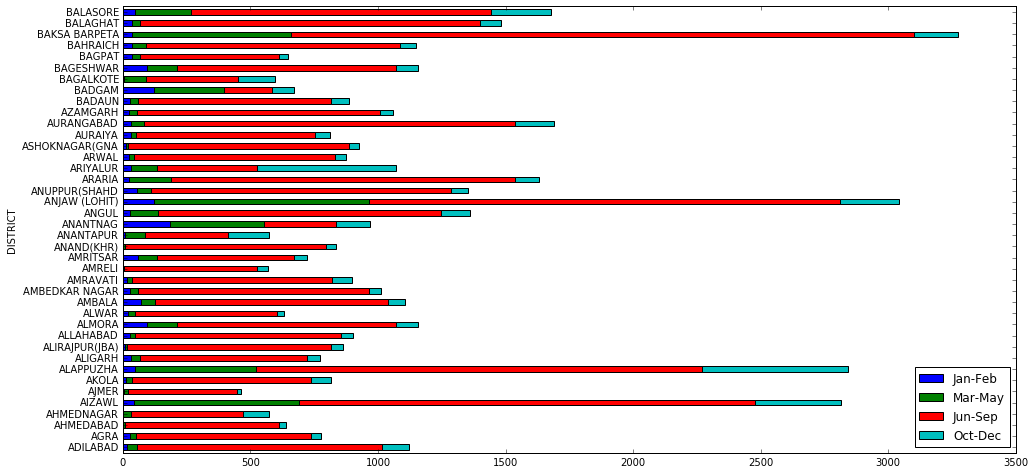

In [35]:
district[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

## Observations
- The above two graphs shows the distribution of over each district.
- As there are large number of districts only 40 were shown in the graphs.

**Andhra Pradesh Data**

In [36]:
ap_data = district[district['STATE_UT_NAME'] == 'ANDHRA PRADESH']

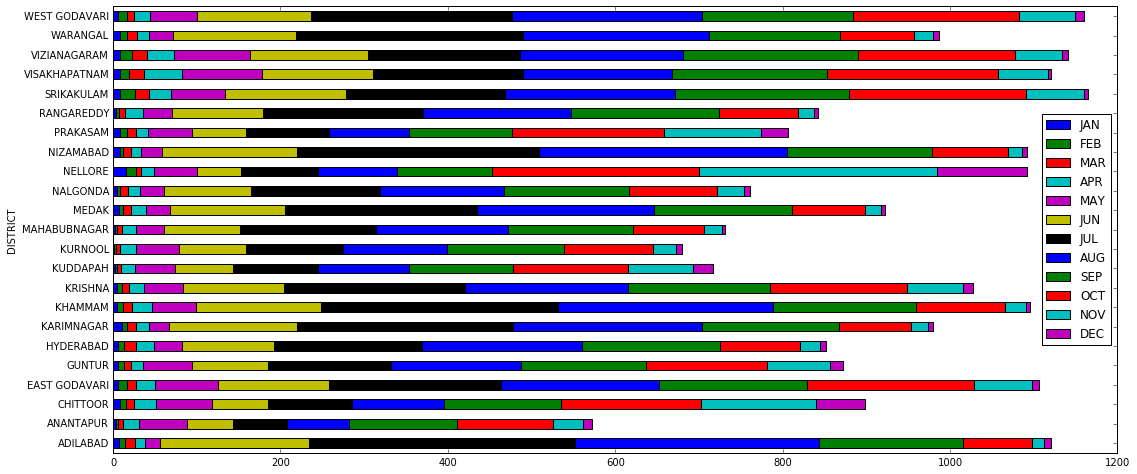

In [37]:
ap_data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(18,8));

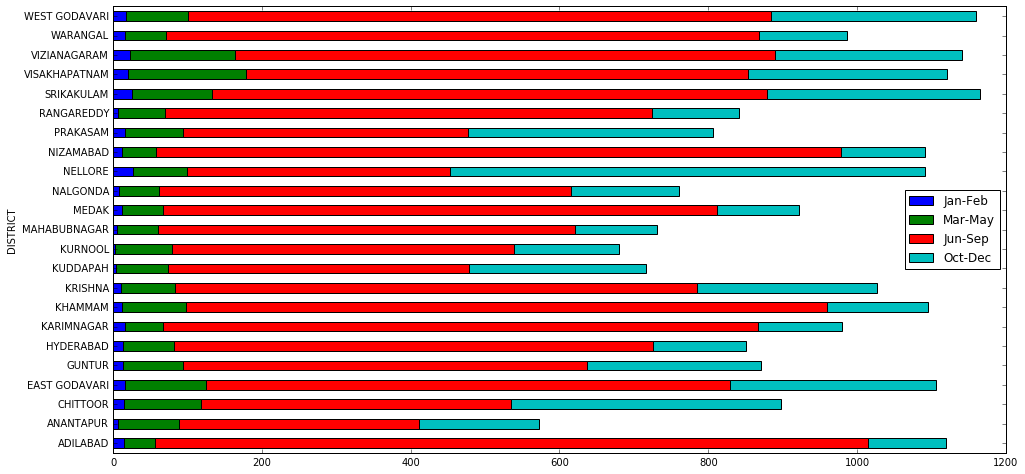

In [38]:
ap_data[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

## Observations
- The above two graphs shows the distribution of over each district in **Andhra Pradesh**.
- The above graphs show that more amount of rainfall is found in srikakulam district, least amount of rainfall is found in Anantapur district.
- It also shows that almost all states have more amount of rainfall have more amount of rainfall in the months june, july, september.

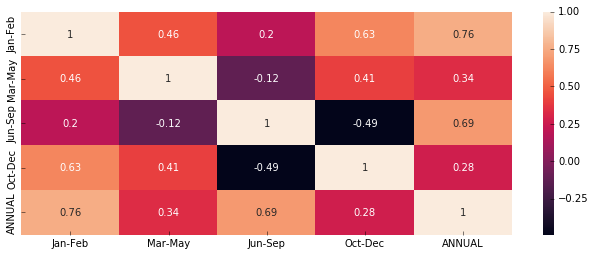

In [39]:
plt.figure(figsize=(11,4))
sns.heatmap(ap_data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

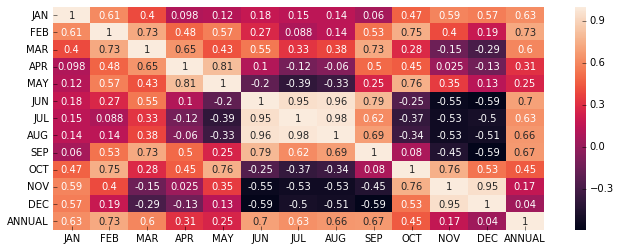

In [40]:
plt.figure(figsize=(11,4))
sns.heatmap(ap_data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

## Observations
- It is observed that in **Andhra Pradesh**, annual rainfall depends more in the months of january, febuary.
- It also shows that if there is rainfall in months march, april, may then there is less amount of rainfall in the months june, july, august, september.

## Predictions
- We used the same types of models and evaluation metrics used for the above dataset.
- We also tested the amount of rainfall in hyderabad by models trained on complete dataset and andhra pradesh dataset.

In [41]:
# testing and training for the complete data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(district[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
temp = district[['DISTRICT','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[district['STATE_UT_NAME'] == 'ANDHRA PRADESH']
hyd = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['DISTRICT'] == 'HYDERABAD'])
# print temp
X_year = None; y_year = None
for i in range(hyd.shape[1]-3):
    if X_year is None:
        X_year = hyd[:, i:i+3]
        y_year = hyd[:, i+3]
    else:
        X_year = np.concatenate((X_year, hyd[:, i:i+3]), axis=0)
        y_year = np.concatenate((y_year, hyd[:, i+3]), axis=0)
 

In [43]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print mean_absolute_error(y_test, y_pred)

57.08862331011236


MEAN Hyderabad
91.48888888888888 108.20250522332894
Standard deviation hyderabad
69.2514651982091 58.90326979488754


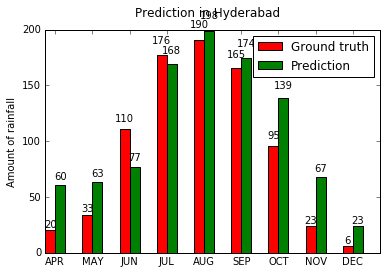

In [44]:
y_year_pred = reg.predict(X_year)
print "MEAN Hyderabad"
print np.mean(y_year),np.mean(y_year_pred)
print "Standard deviation hyderabad"
print np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred))

plot_graphs(y_year,y_year_pred,"Prediction in Hyderabad")

In [45]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print mean_absolute_error(y_test, y_pred)

116.60671510825178


MEAN Hyderabad
91.48888888888888 80.34903236716154
Standard deviation hyderabad
69.2514651982091 0.14736007434982146


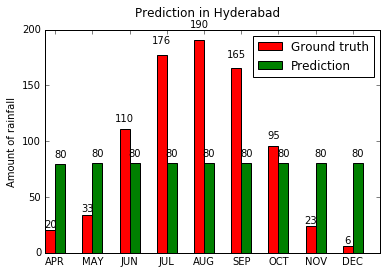

In [46]:
y_year_pred = clf.predict(X_year)
print "MEAN Hyderabad"
print np.mean(y_year),np.mean(y_year_pred)
print "Standard deviation hyderabad"
print np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred))

plot_graphs(y_year,y_year_pred,"Prediction in Hyderabad")


In [47]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print mean_absolute_error(y_test, y_pred)

Train on 4153 samples, validate on 462 samples
Epoch 1/10
4153/4153 [==============================] - 0s 57us/step - loss: 6957.2028 - mean_absolute_error: 50.9468 - val_loss: 3784.2466 - val_mean_absolute_error: 38.6021
Epoch 2/10
4153/4153 [==============================] - 0s 78us/step - loss: 5258.5688 - mean_absolute_error: 43.7378 - val_loss: 3618.7178 - val_mean_absolute_error: 37.8309
Epoch 3/10
4153/4153 [==============================] - 0s 56us/step - loss: 5122.4481 - mean_absolute_error: 42.5880 - val_loss: 4047.8249 - val_mean_absolute_error: 37.8983
Epoch 4/10
4153/4153 [==============================] - 0s 54us/step - loss: 5036.6459 - mean_absolute_error: 42.0330 - val_loss: 3693.8650 - val_mean_absolute_error: 37.4953
Epoch 5/10
4153/4153 [==============================] - 0s 53us/step - loss: 4964.9985 - mean_absolute_error: 41.4354 - val_loss: 3532.0074 - val_mean_absolute_error: 35.9146
Epoch 6/10
4153/4153 [==============================] - 0s 54us/step - loss: 5

MEAN Hyderabad
91.48888888888888 103.67171
Standard deviation hyderabad
69.2514651982091 76.83028


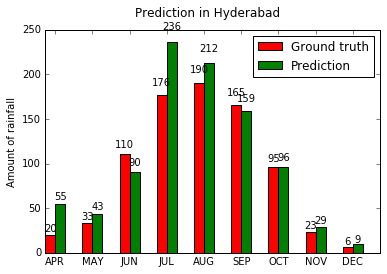

In [48]:
y_year_pred = model.predict(np.expand_dims(X_year, axis=2))
print "MEAN Hyderabad"
print np.mean(y_year),np.mean(y_year_pred)
print "Standard deviation hyderabad"
print np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred))


plot_graphs(y_year,y_year_pred,"Prediction in Hyderabad")

In [49]:
# training and testing sets for only andhra pradesh data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(ap_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print mean_absolute_error(y_test, y_pred)

31.249748674622477


MEAN Hyderabad
91.48888888888888 96.54891993068443
Standard deviation hyderabad
69.2514651982091 60.819355195446896


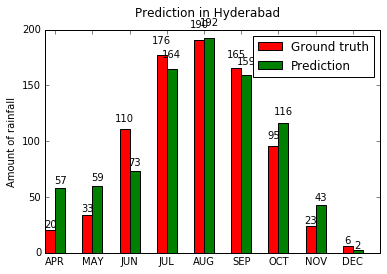

In [51]:
y_year_pred = reg.predict(X_year)
print "MEAN Hyderabad"
print np.mean(y_year),np.mean(y_year_pred)
print "Standard deviation hyderabad"
print np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred))
plot_graphs(y_year,y_year_pred,"Prediction in Hyderabad")

In [52]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print mean_absolute_error(y_test, y_pred)

59.35057496896855


MEAN Hyderabad
91.48888888888888 95.89978206795146
Standard deviation hyderabad
69.2514651982091 0.09247315036320868


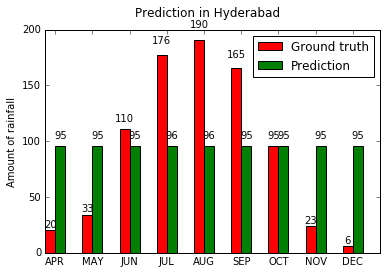

In [53]:
y_year_pred = clf.predict(X_year)
print "MEAN Hyderabad"
print np.mean(y_year),np.mean(y_year_pred)
print "Standard deviation hyderabad"
print np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred))
plot_graphs(y_year,y_year_pred,"Prediction in Hyderabad")


In [54]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print mean_absolute_error(y_test, y_pred)

Train on 148 samples, validate on 17 samples
Epoch 1/10
148/148 [==============================] - 0s 120us/step - loss: 1778.6490 - mean_absolute_error: 30.9451 - val_loss: 1446.8748 - val_mean_absolute_error: 27.5400
Epoch 2/10
148/148 [==============================] - 0s 91us/step - loss: 1664.5006 - mean_absolute_error: 29.9809 - val_loss: 1278.2192 - val_mean_absolute_error: 24.9887
Epoch 3/10
148/148 [==============================] - 0s 92us/step - loss: 1504.4134 - mean_absolute_error: 28.0781 - val_loss: 1205.8508 - val_mean_absolute_error: 24.3124
Epoch 4/10
148/148 [==============================] - 0s 89us/step - loss: 1405.6685 - mean_absolute_error: 26.9898 - val_loss: 1207.5862 - val_mean_absolute_error: 25.0976
Epoch 5/10
148/148 [==============================] - 0s 84us/step - loss: 1399.6531 - mean_absolute_error: 26.8409 - val_loss: 1229.2842 - val_mean_absolute_error: 26.1517
Epoch 6/10
148/148 [==============================] - 0s 83us/step - loss: 1364.1109 - me

MEAN Hyderabad
91.48888888888888 100.606964
Standard deviation hyderabad
69.2514651982091 66.957054


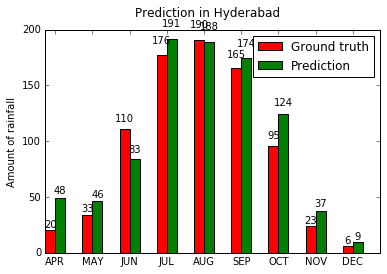

In [55]:
y_year_pred = model.predict(np.expand_dims(X_year, axis=2))
print "MEAN Hyderabad"
print np.mean(y_year),np.mean(y_year_pred)
print "Standard deviation hyderabad"
print np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred))
plot_graphs(y_year,y_year_pred,"Prediction in Hyderabad")


## Prediction Observations

### Training on complete dataset

|Algorithm| MAE|
|---------|----|
|Linear Regression| 57.08862331011236|
|SVR| 116.60671510825178|
|Artificial neural nets |44.329664907381066|

### Training on telangana dataset

|Algorithm| MAE|
|---------|----|
|Linear Regression| 31.249748674622477|
|SVR| 59.35057496896855|
|Artificial neural nets |31.0601823988415|

- Neural Networks performs better than SVR etc.
- Bad performance by SVR model.
- Andhra Pradesh data has a single pattern that can be learned by models, rather than learning different patterns of all states. so has high accuracy.
- Analysed individual year rainfall patterns for Hyderabad district.
- Approximately close means, noticed close standard deviations.

## Conclusions
- Various visualizations of data are observed which helps in implementing the approaches for prediction.
- Prediction of amount of rainfall for both the types of dataset.
- Observations indicates machine learning models won't work well for prediction of rainfall due to fluctutaions in rainfall.

## Technologies
- Programming language : *Python*
- Libraries : *numpy, pandas, matplotlib, seaborn, keras, scipy, sklearn*
- Github repo: [link](https://github.com/sudheerachary/rainfall-prediction)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(bootstrap=True,max_depth=10,min_samples_leaf=4,min_samples_split=10,n_estimators=200,random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)
print(f"Mean Absolute Error (Test): {mean_absolute_error(y_test, y_pred)}")

# Yearly predictions
y_year_pred_2005 = random_forest_model.predict(X_year_2005)
y_year_pred_2010 = random_forest_model.predict(X_year_2010)

# Print statistics for 2005
print("MEAN 2005")
print(np.mean(y_year_2005), np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)), np.sqrt(np.var(y_year_pred_2005)))

# Print statistics for 2010
print("MEAN 2010")
print(np.mean(y_year_2010), np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)), np.sqrt(np.var(y_year_pred_2010)))


# Define a function for plotting the graphs
plot_graphs(y_year_2005, y_year_pred_2005, "Random Forest - Year 2005")
plot_graphs(y_year_2010, y_year_pred_2010, "Random Forest - Year 2010")
